In [90]:
import pandas as pd
import numpy as np


In [91]:
train_df = pd.read_csv("train.csv")

In [92]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
train_df.shape

(891, 12)

In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As more than 75% of the data is missing data in the cabin column it is better to drop the column 

In [97]:
train_df.drop(columns=['Cabin'],inplace=True)

In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	 siblings / spouses aboard the Titanic	
parch parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt


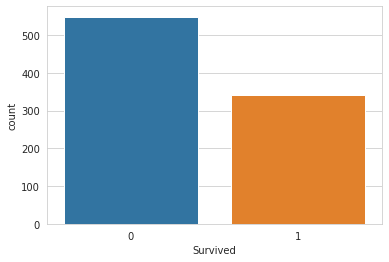

In [100]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=train_df)

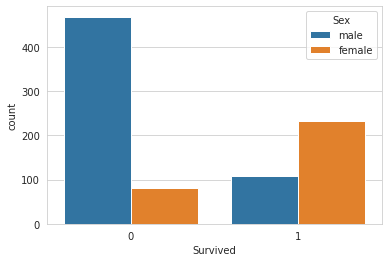

In [101]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Sex',data=train_df)

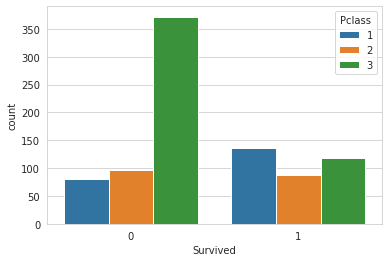

In [102]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Pclass',data=train_df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


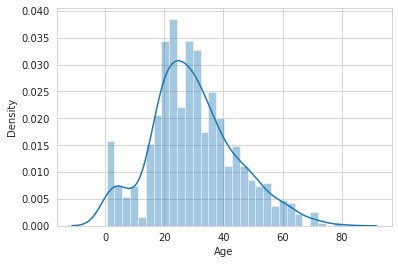

In [103]:

sns.distplot(train_df['Age'].dropna(),bins=30)

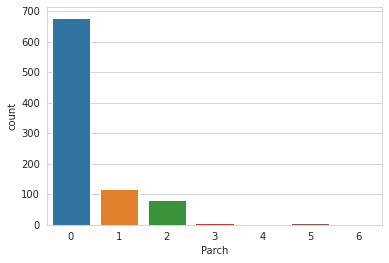

In [104]:
sns.countplot(data=train_df,x='Parch')

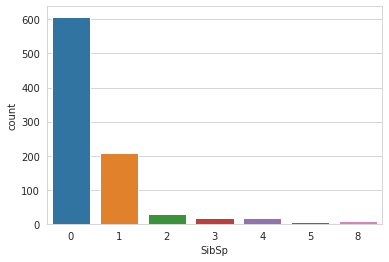

In [105]:
sns.countplot(data=train_df,x='SibSp')

Finding the missing values and cleaning the data

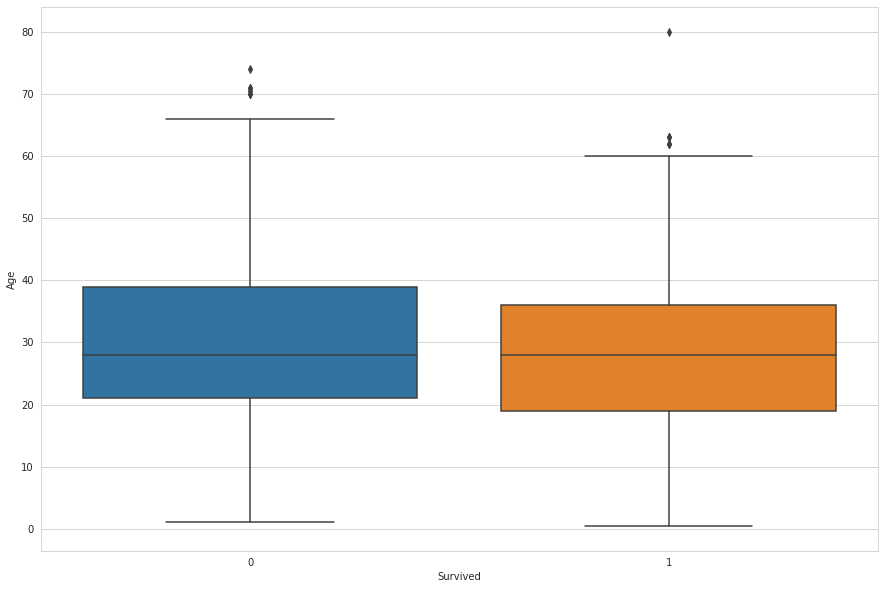

In [106]:
plt.figure(figsize=(15,10))
sns.boxplot(data=train_df,x='Survived',y='Age')

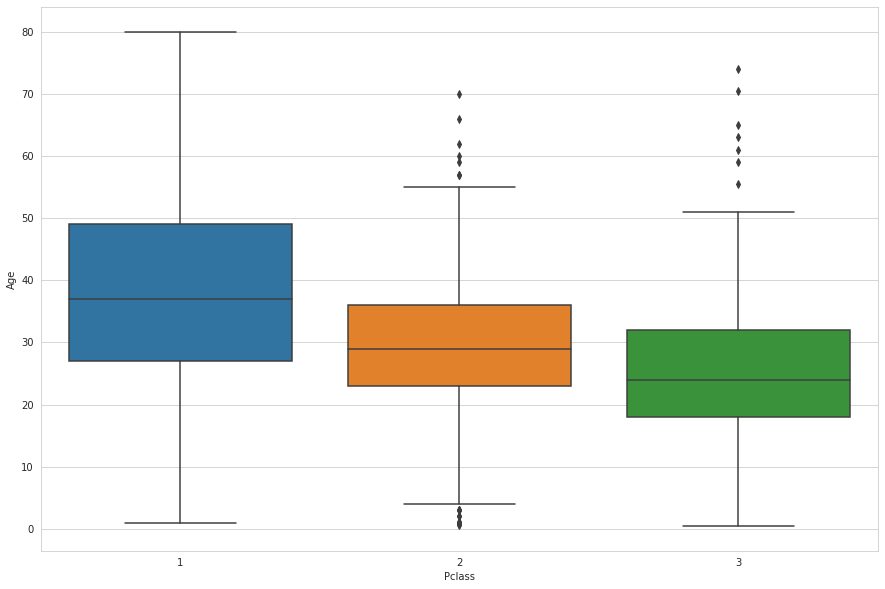

In [107]:
plt.figure(figsize=(15,10))
sns.boxplot(data=train_df,x='Pclass',y='Age')

In [108]:
train_df['Age'].isnull().sum()

177

From the above statement output in the age column about 80% of the column has age values rest of them are having the missing values.So in order to fill the missing values replace the missing value with the "Mean" Age with the average of the passenger based on the class. 

In [109]:
##df.Age.fillna(df.Age.mean(),inplace=True)

In [110]:
def fill_age(col):
  Age = col[0]
  Pclass = col[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 25
  else:
    return Age

In [111]:
train_df['Age'] = train_df[['Age','Pclass']].apply(fill_age,axis=1)

In [112]:

train_df['Age'].isnull().sum()

0

In [113]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [114]:
train_df.dropna(inplace=True)

**Using get_dummies encoding the categorical variables. **

In [115]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [116]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [117]:
train_df['Title'] = train_df['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
title_dict = {}
title_dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
train_df['Title'] = train_df['Title'].map(title_dict)

In [118]:
train_df.drop(columns=['Name'],inplace=True)

In [119]:
train_df.drop(columns=['Ticket'],inplace=True)

In [120]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [121]:
sex = pd.get_dummies(train_df['Sex'])

In [122]:
embarked = pd.get_dummies(train_df['Embarked'])

In [123]:
embarked.value_counts()

C  Q  S
0  0  1    644
1  0  0    168
0  1  0     77
dtype: int64

In [124]:
train_df.drop(columns=['Sex','Embarked','PassengerId'],inplace=True)

In [125]:
train_df = pd.concat([train_df,sex,embarked],axis=1)

In [126]:
train_df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,Mr,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,Mrs,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,Miss,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,Mrs,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,Mr,0,1,0,0,1


**Implementing Logistic Regression**

In [127]:
title = pd.get_dummies(train_df['Title'])
train_df=pd.concat([train_df,title],axis=1)
train_df.drop(columns=['Title'],inplace=True)

In [128]:
train_df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0


In [129]:
train_target = train_df['Survived'].copy()
type(train_target)
target = train_target.values
print(type(target))
for i in range(10):
  print(target[i])

<class 'numpy.ndarray'>
0
1
1
1
0
0
0
0
1
1


As survived column is the target variable we are dropping the column and tranforming the data frame to the numpy ndarray

In [130]:
train_features = train_df.drop('Survived',axis=1)
train_features.shape
features = train_features.values
print(type(features))
for i in range(10):
  print(features[i])

<class 'numpy.ndarray'>
[ 3.   22.    1.    0.    7.25  0.    1.    0.    0.    1.    0.    0.
  1.    0.    0.    0.  ]
[ 1.     38.      1.      0.     71.2833  1.      0.      1.      0.
  0.      0.      0.      0.      1.      0.      0.    ]
[ 3.    26.     0.     0.     7.925  1.     0.     0.     0.     1.
  0.     1.     0.     0.     0.     0.   ]
[ 1.  35.   1.   0.  53.1  1.   0.   0.   0.   1.   0.   0.   0.   1.
  0.   0. ]
[ 3.   35.    0.    0.    8.05  0.    1.    0.    0.    1.    0.    0.
  1.    0.    0.    0.  ]
[ 3.     25.      0.      0.      8.4583  0.      1.      0.      1.
  0.      0.      0.      1.      0.      0.      0.    ]
[ 1.     54.      0.      0.     51.8625  0.      1.      0.      0.
  1.      0.      0.      1.      0.      0.      0.    ]
[ 3.     2.     3.     1.    21.075  0.     1.     0.     0.     1.
  1.     0.     0.     0.     0.     0.   ]
[ 3.     27.      0.      2.     11.1333  1.      0.      0.      0.
  1.      0.      0.      

In [131]:
train_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [132]:
train_features.head(10)

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Master,Miss,Mr,Mrs,Officer,Royalty
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0
5,3,25.0,0,0,8.4583,0,1,0,1,0,0,0,1,0,0,0
6,1,54.0,0,0,51.8625,0,1,0,0,1,0,0,1,0,0,0
7,3,2.0,3,1,21.0750,0,1,0,0,1,1,0,0,0,0,0
8,3,27.0,0,2,11.1333,1,0,0,0,1,0,0,0,1,0,0
9,2,14.0,1,0,30.0708,1,0,1,0,0,0,0,0,1,0,0


sigmoid is the function which takes the input paramters and gives the probabilities of the input variable as 0's and 1's 
g(z) = 1/(1+exp(-z))

Cost function or Loss Function: To minimze the distance between the actual and predict values based on the absolute mean error.

gradient Descent is used to find the coefficients of the function.

In [133]:
class LogisticRegression:
  def sigmoid(self,mvalue,features):
    x = np.dot(features,mvalue)
    return 1/(1+np.exp(-x))


  def costFunction(self,mvalue,features,target):
    predict = self.sigmoid(mvalue,features)
    loss = ((-target*np.log(predict))-((1-target)*np.log(1-predict))).mean()
    return loss

  def gradientDescent(self,mvalue,features,target,lr):
    predict = self.sigmoid(mvalue,features)
    diff = np.dot(features.T,(predict-target))/len(target)
    mvalue = mvalue-lr*diff
    return mvalue


lr is learning rate of the model which is nothing but aplha helps in defining the change in the coefficient for each and every iteration.epoch is number of iterations

In [134]:
lr = 0.001
epoch = 100000

mvalues = np.zeros(features.shape[1])

log_reg = LogisticRegression()
for i in range(epoch):
  mvalues = log_reg.gradientDescent(mvalues,features,target,lr)
  error = log_reg.costFunction(mvalues,features,target)

In [135]:
predict_data = log_reg.sigmoid(mvalues,features)

for i in range(len(predict_data)):
  if (predict_data[i]>0.5):
    predict_data[i]=1
  elif(predict_data[i]<=0.5):
    predict_data[i]=0

**Accuracy = number of correct predictions/Total number of total predictions**

In [136]:
correct_predict = 0

for i in range(len(predict_data)):
  if(predict_data[i]==target[i]):
    correct_predict+=1

accuracy = correct_predict/len(predict_data)
print("Accuracy is",accuracy*100,"%")

Accuracy is 81.77727784026997 %


In [137]:
test_data = pd.read_csv("test.csv")

In [138]:
type(test_data)

pandas.core.frame.DataFrame

In [139]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [140]:
test_data = test_data.drop(columns=['Cabin','Ticket'],axis=1)

In [141]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [142]:
test_data['Age'] = test_data[['Age','Pclass']].apply(fill_age,axis=1)

In [143]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [144]:
test_data['Title'] = test_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Title'].map(title_dict)


In [145]:
test_encode = pd.get_dummies(test_data,columns=['Sex','Embarked','Title'])

In [146]:
passenger_id = test_data['PassengerId'].copy().values

In [147]:
test_data = pd.concat([test_encode],axis=1)

In [148]:
test_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,892,3,"Kelly, Mr. James",34.5,0,0,7.8292,0,1,0,1,0,0,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,1,0,0,0,1,0,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,0,1,0,1,0,0,0,1,0,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,0,1,0,0,1,0,0,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,1,0,0,0,1,0,0,0,1,0,0


In [149]:
test_data = test_data.drop(columns=['Name','PassengerId'],axis=1)

In [150]:
type(test_data)

pandas.core.frame.DataFrame

In [151]:
test_data.head(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,34.5,0,0,7.8292,0,1,0,1,0,0,0,1,0,0,0
1,3,47.0,1,0,7.0000,1,0,0,0,1,0,0,0,1,0,0
2,2,62.0,0,0,9.6875,0,1,0,1,0,0,0,1,0,0,0
3,3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1,0,0,0
4,3,22.0,1,1,12.2875,1,0,0,0,1,0,0,0,1,0,0


In [152]:
len(test_data)

418

In [153]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Age            418 non-null    float64
 2   SibSp          418 non-null    int64  
 3   Parch          418 non-null    int64  
 4   Fare           417 non-null    float64
 5   Sex_female     418 non-null    uint8  
 6   Sex_male       418 non-null    uint8  
 7   Embarked_C     418 non-null    uint8  
 8   Embarked_Q     418 non-null    uint8  
 9   Embarked_S     418 non-null    uint8  
 10  Title_Master   418 non-null    uint8  
 11  Title_Miss     418 non-null    uint8  
 12  Title_Mr       418 non-null    uint8  
 13  Title_Mrs      418 non-null    uint8  
 14  Title_Officer  418 non-null    uint8  
 15  Title_Royalty  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(11)
memory usage: 20.9 KB


In [154]:
test_features = test_data.iloc[:len(test_data)].values

In [155]:
type(test_features)

numpy.ndarray

In [156]:
test_features.shape

(418, 16)

In [159]:
predict_test = log_reg.sigmoid(mvalues,test_features)

In [160]:
test_survived_count = 0


for i in range(len(predict_test)):
  if predict_test[i]>0.5:
    test_survived_count+=1
    predict_test[i] = 1
  else:
    predict_test[i] = 0

print("Number of survived members are",test_survived_count)

Number of survived members are 157


In [161]:
predict_test = predict_test.astype(int)

submit = pd.DataFrame({
    "PassengerId":passenger_id,
    "Survived":predict_test
})
submit.to_csv("Survived.csv")

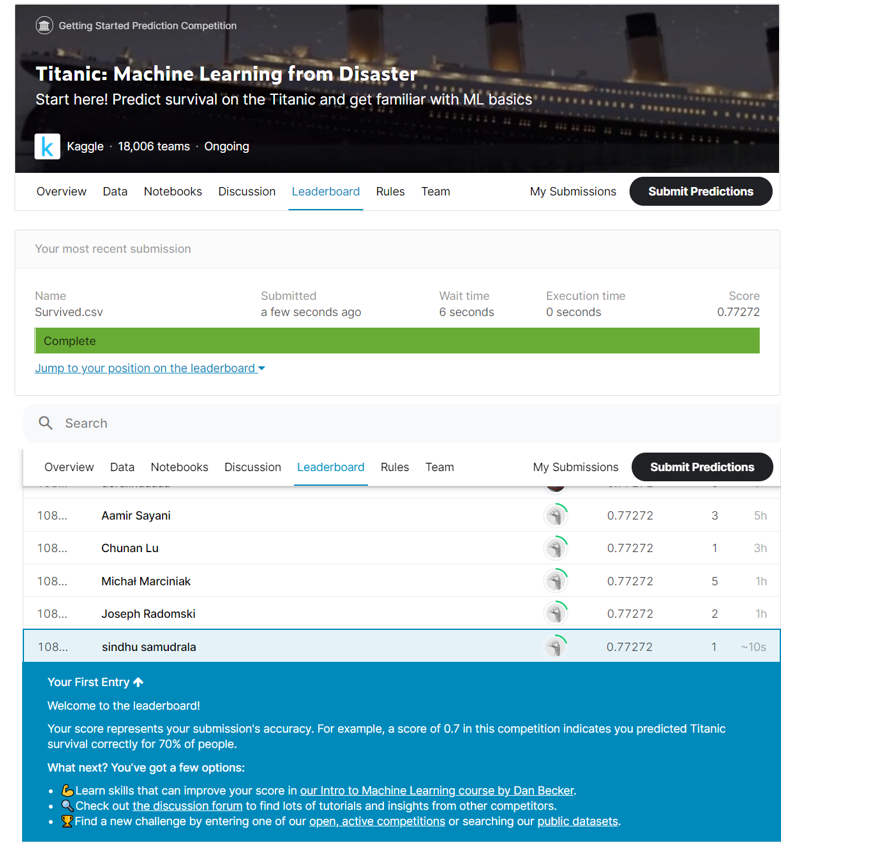